# Jogadores com passes mais importantes na Bundesliga

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 5000
pd.options.display.max_columns = 50

In [63]:
# Temporada 2020/21
#df_raw = pd.read_html('https://fbref.com/en/share/j5J5P')[0]

# Temporada 2021/22
#df_raw = pd.read_html('https://fbref.com/en/share/AO9Wu')[0] # rodada 2
#df_raw = pd.read_html('https://fbref.com/en/share/sX2eO')[0] # rodada 3
df_raw = pd.read_html('https://fbref.com/en/share/5Xhlo')[0] # rodada 4

In [64]:
# As tabelas do FBref em html vem com dois problemas que precisam ser resolvidos:
# 1) O cabeçalho multidimensional, que dificulta a análise exploratória e a criação de visualizações
# 2) A repetição do cabeçalho ao longo do data frame (1º na 25ª linha, e depois a cada 26 linhas)
df_raw.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Dickson Abiama             ng NGA                 FW   
1                  2        Ragnar Ache             de GER              FW,MF   
2                  3        Tyler Adams             us USA                 MF   
3                  4     Sargis Adamyan             am ARM              FW,MF   
4                  5         Amine Adli             fr FRA              FW,MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad                Age               Born                90s   
0     Greuther Fürth             22-315               1998                2.6   
1     Eint Frankfurt             23-048               1998                0.3   
2         RB Leipzig             22-212               1999                2.6   
3         Hoffenheim             28-114               1993                0.9   
4         Leverkusen             21-127               2000                0.4   

  Total                            Short           Medium           Long      \
    Cmp  Att  Cmp% TotDist PrgDist   Cmp Att  Cmp%    Cmp Att  Cmp%  Cmp Att   
0    27   37  73.0     352     104    19  24  79.2      7   9  77.8    0   1   
1     6    9  66.7      66       1     3   4  75.0      2   3  66.7    0   0   
2   124  147  84.4    2205     574    55  61  90.2     48  55  87.3   15  24   
3    20   28  71.4     306      72    11  13  84.6      7  11  63.6    2   2   
4    13   16  81.3     233      59     7   8  87.5      5   6  83.3    1   1   

         Unnamed: 22_level_0 Unnamed: 23_level_0 Unnamed: 24_level_0  \
    Cmp%                 Ast                  xA                A-xA   
0    0.0                   1                 0.6                +0.4   
1    NaN                   1                 0.0                +1.0   
2   62.5                   0                 0.0                 0.0   
3  100.0                   0                 0.1                -0.1   
4  100.0                   0                 0.0                 0.0   

  Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                   KP                 1/3                 PPA   
0                   3                   0                   2   
1                   0                   0                   0   
2                   1                  21                   2   
3                   1                   1                   0   
4                   1                   3                   1   

  Unnamed: 28_level_0 Unnamed: 29_level_0 Unnamed: 30_level_0  
                CrsPA                Prog             Matches  
0                   0                   2             Matches  
1                   0                   0             Matches  
2                   0                  11             Matches  
3                   0                   4             Matches  
4                   0                   3             Matches

In [65]:
# "Limpando" a tabela

# Resolvendo o problema 1
df_raw.columns = df_raw.columns.get_level_values(-1)

# Resolvendo o problema 2
x = 0
while (25 + (26 * x)) < len(df_raw):
    df_raw = df_raw.drop([25 + (26 * x)], axis = 0)
    x += 1
    
# Poderia resolver da forma abaixo, mas teria que atualizar as linhas que precisam ser excluídas de acordo com o tamanho do df    
#df_raw = df_raw.drop([25, 51, 77, 103, 129, 155, 181, 207, 233, 259, 285, 311], axis = 0)
df_raw.head(30)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Dickson Abiama,ng NGA,FW,Greuther Fürth,22-315,1998,2.6,27,37,73.0,352,104,19,24,79.2,7,9,77.8,0,1,0.0,1,0.6,+0.4,3,0,2,0,2,Matches
1,2,Ragnar Ache,de GER,"FW,MF",Eint Frankfurt,23-048,1998,0.3,6,9,66.7,66,1,3,4,75.0,2,3,66.7,0,0,NaN,1,0.0,+1.0,0,0,0,0,0,Matches
2,3,Tyler Adams,us USA,MF,RB Leipzig,22-212,1999,2.6,124,147,84.4,2205,574,55,61,90.2,48,55,87.3,15,24,62.5,0,0.0,0.0,1,21,2,0,11,Matches
3,4,Sargis Adamyan,am ARM,"FW,MF",Hoffenheim,28-114,1993,0.9,20,28,71.4,306,72,11,13,84.6,7,11,63.6,2,2,100.0,0,0.1,-0.1,1,1,0,0,4,Matches
4,5,Amine Adli,fr FRA,"FW,MF",Leverkusen,21-127,2000,0.4,13,16,81.3,233,59,7,8,87.5,5,6,83.3,1,1,100.0,0,0.0,0.0,1,3,1,0,3,Matches
5,6,Manuel Akanji,ch SUI,DF,Dortmund,26-057,1995,4.0,341,365,93.4,8087,2739,69,73,94.5,195,200,97.5,76,91,83.5,0,0.0,0.0,1,33,0,0,34,Matches
6,7,Kevin Akpoguma,ng NGA,DF,Hoffenheim,26-148,1995,2.8,113,141,80.1,1990,992,57,67,85.1,44,56,78.6,11,16,68.8,1,0.1,+0.9,2,11,0,0,12,Matches
7,8,Lucas Alario,ar ARG,FW,Leverkusen,28-341,1992,0.1,3,4,75.0,33,11,2,3,66.7,1,1,100.0,0,0,NaN,0,0.0,0.0,0,0,0,0,0,Matches
8,9,Nadiem Amiri,de GER,FW,Leverkusen,24-322,1996,1.2,61,73,83.6,1049,130,30,32,93.8,21,25,84.0,8,12,66.7,0,0.0,0.0,1,2,2,0,2,Matches
9,10,Sebastian Andersson,se SWE,FW,Köln,30-061,1991,2.1,30,38,78.9,356,59,18,21,85.7,8,11,72.7,0,1,0.0,0,0.0,0.0,0,2,1,0,1,Matches


In [66]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 394
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       381 non-null    object
 1   Player   381 non-null    object
 2   Nation   381 non-null    object
 3   Pos      381 non-null    object
 4   Squad    381 non-null    object
 5   Age      381 non-null    object
 6   Born     381 non-null    object
 7   90s      381 non-null    object
 8   Cmp      381 non-null    object
 9   Att      381 non-null    object
 10  Cmp%     379 non-null    object
 11  TotDist  381 non-null    object
 12  PrgDist  381 non-null    object
 13  Cmp      381 non-null    object
 14  Att      381 non-null    object
 15  Cmp%     374 non-null    object
 16  Cmp      381 non-null    object
 17  Att      381 non-null    object
 18  Cmp%     374 non-null    object
 19  Cmp      381 non-null    object
 20  Att      381 non-null    object
 21  Cmp%     351 non-null    object
 22  As

In [67]:
# Vendo a célula acima, dá pra notar que todas as colunas do data frame são do tipo objeto
# Para plotar as estatísticas no gráfico, é necessário que elas sejam interpretadas como números pelo Pandas
# Para isso, vamos converter cada uma das colunas necessárias para o gráfico

df_raw['xA'] = pd.to_numeric(df_raw['xA'], errors='coerce')
df_raw['1/3'] = pd.to_numeric(df_raw['1/3'], errors='coerce')
df_raw['Ast'] = pd.to_numeric(df_raw['Ast'], errors='coerce')
df_raw['PPA'] = pd.to_numeric(df_raw['PPA'], errors='coerce')

In [68]:
df_raw.sort_values(['Ast'], ascending = False).head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
197,191,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-087,1991,4.0,115,146,78.8,2041,620,60,72,83.3,36,41,87.8,14,19,73.7,4.0,1.9,+2.1,6,14.0,7.0,3,14,Matches
131,127,Erling Haaland,no NOR,FW,Dortmund,21-055,2000,4.0,78,101,77.2,954,232,45,56,80.4,17,23,73.9,3,5,60.0,4.0,1.6,+2.4,7,2.0,7.0,0,11,Matches
384,371,Florian Wirtz,de GER,"MF,FW",Leverkusen,18-134,2003,1.4,49,57,86.0,869,276,24,26,92.3,19,23,82.6,6,7,85.7,3.0,0.7,+2.3,5,4.0,3.0,0,8,Matches
343,331,Borna Sosa,hr CRO,DF,Stuttgart,23-236,1998,3.8,148,208,71.2,2494,921,79,91,86.8,51,70,72.9,17,37,45.9,3.0,0.9,+2.1,8,6.0,10.0,7,14,Matches
185,179,Joshua Kimmich,de GER,MF,Bayern Munich,26-218,1995,4.0,237,293,80.9,5103,1841,82,93,88.2,99,111,89.2,49,76,64.5,3.0,1.6,+1.4,11,34.0,3.0,0,28,Matches


In [69]:
df = df_raw[['Player', 'Nation', 'Pos', 'Squad', 'Age', '90s', 'xA', 'PPA', 'Ast', 'KP', 'CrsPA', 'Prog']]
df.head()

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
0,Dickson Abiama,ng NGA,FW,Greuther Fürth,22-315,2.6,0.6,2.0,1.0,3,0,2
1,Ragnar Ache,de GER,"FW,MF",Eint Frankfurt,23-048,0.3,0.0,0.0,1.0,0,0,0
2,Tyler Adams,us USA,MF,RB Leipzig,22-212,2.6,0.0,2.0,0.0,1,0,11
3,Sargis Adamyan,am ARM,"FW,MF",Hoffenheim,28-114,0.9,0.1,0.0,0.0,1,0,4
4,Amine Adli,fr FRA,"FW,MF",Leverkusen,21-127,0.4,0.0,1.0,0.0,1,0,3


In [70]:
# Criando esse novo data frame (df_xA), estou possibilitando que os nomes dos jogadores sejam gerados automaticamente no gráfico
# Primeiro eu organizo os jogadores em ordem decrescente de xA para ver quem são os melhores nesse quesito
df_xA = df.sort_values(['xA'], ascending = False)

# Em seguida, dou reset no index para que o jogador que lidera a lista tenha o valor 0 como index
# Os principais jogadores nesse quesito precisam ser os primeiros do index para facilitar o trabalho na hora de referenciá-los
df_xA = df_xA.reset_index(drop = True)
df_xA.head()

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
0,Andrej Kramarić,hr CRO,"FW,MF",Hoffenheim,30-087,4.0,1.9,7.0,4.0,6,3,14
1,Jamal Musiala,de GER,FW,Bayern Munich,18-200,1.9,1.7,7.0,2.0,6,0,14
2,Erling Haaland,no NOR,FW,Dortmund,21-055,4.0,1.6,7.0,4.0,7,0,11
3,Joshua Kimmich,de GER,MF,Bayern Munich,26-218,4.0,1.6,3.0,3.0,11,0,28
4,Max Kruse,de GER,FW,Union Berlin,33-179,3.5,1.6,5.0,2.0,8,1,9


In [71]:
# Ver explicação na célula acima
df_PPA = df.sort_values(['PPA'], ascending = False)
df_PPA = df_PPA.reset_index(drop = True)
df_PPA.head()

,Player,Nation,Pos,Squad,Age,90s,xA,PPA,Ast,KP,CrsPA,Prog
0,Borna Sosa,hr CRO,DF,Stuttgart,23-236,3.8,0.9,10.0,3.0,8,7,14
1,Florian Kainz,at AUT,MF,Köln,28-325,3.4,0.9,10.0,1.0,10,2,17
2,Dejan Ljubicic,at AUT,MF,Köln,23-341,3.4,0.3,9.0,0.0,5,2,13
3,Thomas Müller,de GER,MF,Bayern Munich,32-001,3.6,0.5,9.0,1.0,5,3,22
4,Dominik Szoboszlai,hu HUN,FW,RB Leipzig,20-324,2.8,0.7,9.0,0.0,8,3,11


<function matplotlib.pyplot.show(close=None, block=None)>

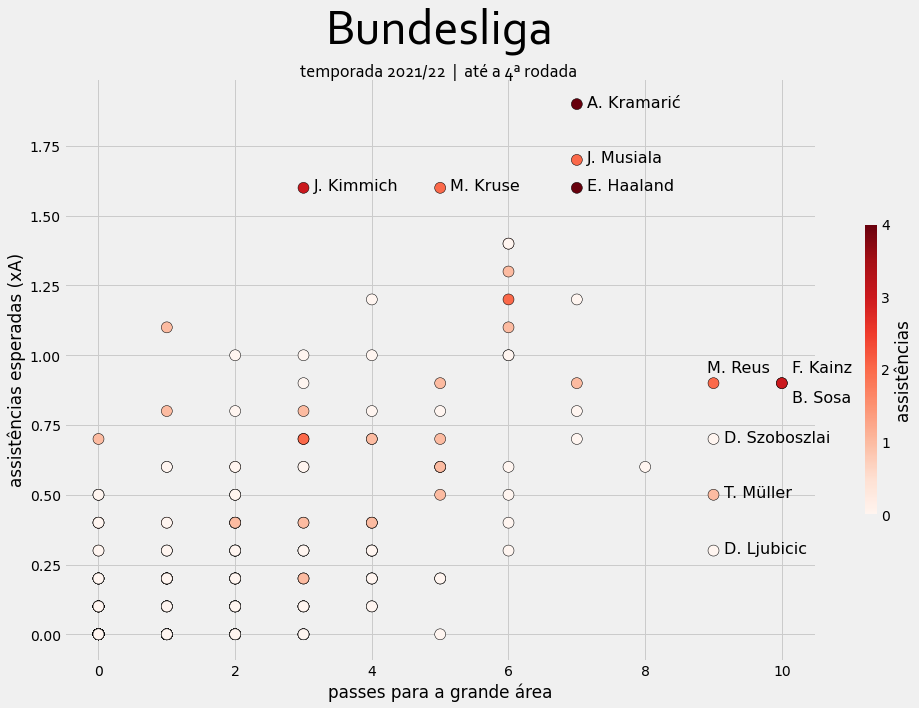

In [72]:
# Gráfico
fig, ax = plt.subplots(figsize = (15, 10))

# Estilo do gráfico
plt.style.use('fivethirtyeight')

# Pontos no gráfico
plt.scatter(x = df['PPA'], y = df['xA'], c = df['Ast'], s = 120, cmap = 'Reds', edgecolor = 'black', linewidth = 0.5)

# Barra de cor
cbar = plt.colorbar(format = '%.f', shrink = 0.5)
cbar.set_label('assistências')
cbar.set_ticks([0, 1, 2, 3, 4])

# Labels 
plt.xlabel('passes para a grande área')
plt.ylabel('assistências esperadas (xA)')

# Título e subtítulo
plt.title('Bundesliga', y = 1.05, fontsize = 50, fontname = 'Corbel')
plt.text(s = 'temporada 2021/22  |  até a 4ª rodada', y = 2, x = 2.95, fontsize = 18, fontname = 'Corbel')

# Nomes dos jogadores. A cada iteração é plotado no gráfico o nome de um dos líderes em PPA e em xA
for x in range(2, 5):
    plt.text(x = df_PPA['PPA'][x] + 0.15, y = df_PPA['xA'][x] - 0.01, fontsize = 16, 
             s = '{}. {}'.format(df_PPA['Player'][x][0], df_PPA['Player'][x].split(' ')[1]))
    
for x in range(0, 5):
    plt.text(x = df_xA['PPA'][x] + 0.15, y = df_xA['xA'][x] - 0.01, fontsize = 16, 
             s = '{}. {}'.format(df_xA['Player'][x][0], df_xA['Player'][x].split(' ')[1]))
    # A variável s ficou complexa para não mostrar nome e sobrenome completos no gráfico
    # Fiz ajustes nas variáveis x e y para ajustar levemente onde os nomes aparecem no gráfico
    
# Adaptação para o caso de nomes no gráfico ficarem sobrepostos
plt.text(x = 10.15, y = 0.94, fontsize = 16, s = 'F. Kainz')
plt.text(x = 10.15, y = 0.83, fontsize = 16, s = 'B. Sosa')
plt.text(x = 8.9, y = 0.94, fontsize = 16, s = 'M. Reus')

plt.show

# Salvar imagem?
#plt.savefig('xAPPA4.png', dpi = 300)

# A cada atualização, vou precisar mudar poucas coisas no código:
# 2) O subtítulo
# 3) As ticks da color bar